## Predicting Experience of Players on a Video Game Research Server
### DSCI Final Project Report 
**Project 009-35**

Group Members: Audryleine Isidro(70928791), Jiatong Liu(), Daniel Yu()

`Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and fully describe the dataset that was used to answer the question`

### Introduction 
It is important to understand how different players engage with a video game research server to manage resources and plan effective recruitment strategies. 

A research group in Computer Science at UBC, led by Frank Wood, gathers detailed gameplay information from a custom Minecraft server. Because maintaining this project demands substantial resources, the team must identify which players are most likely to produce large amounts of data. Doing so helps them focus their recruitment efforts on players who will provide the most useful and impactful contributions.

In this project, we focus on determining which "kinds" of players are most likely to contribute a large amount of data so that recruitment efforts can be better targeted. Specifically, we explore **whether a player’s experience level in Minecraft can be predicted using their age and total played hours**. We selected this focus because recruiters who aim to maximize gameplay data, such as total hours played, may benefit from understanding how these characteristics relate to experience. Our findings can help identify which types of players should be prioritized if the goal is to target particular age groups or players with the potential to generate more extensive gameplay data. Overall, we aim to determine whether measurable player characteristics are associated with being more experienced, which may indicate a higher likelihood of contributing large data.

Our intended information source is the `Players` data set 

Number of observed rows: `196`
Number of observed columns: `7`

Columns in the dataset:
- `experience` - The experience level of each player who plays Minecraft (Beginner, Amateur, Pro, Regular and Veteran)
- `subscribe` - Whether the player subscribed to a game-related newsletter or communications. (True or False)
- `hashedEmail` - An anonymous player ID
- `played_hours` - Total number of hours the player has spent playing the game
- `name` - The player's display name
- `gender` The player's reported gender
- `age` The player's age in years

`Methods & Results:`
- `describe the methods you used to perform your analysis from beginning to end that narrates the analysis code. your report should include code which:`
- `loads data `
- `wrangles and cleans the data to the format necessary for the planned analysis`
- `performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis `
- `creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis`
- `performs the data analysis`
- `creates a visualization of the analysis `
`note: all figures should have a figure number and a legend`

In [1]:
# imperative packages need to be loaded
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
# load data
url<-"https://raw.githubusercontent.com/audryleine-isidro/dsci-final-project/refs/heads/main/players.csv"
players<-read_csv(url)

# inspect the structure of the data
glimpse(players)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
# wrangle and clean data

# select the relevant variables, convert experience to a factor type, and remove rows containing missing value
players<-players|>
    select (experience,played_hours,Age)|>
    mutate(experience = as_factor(experience))|>
    drop_na()

players

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Veteran,0.3,22
Amateur,0.0,57
Amateur,2.3,17


**Summary of Dataset**

In [ ]:
#summary of dataset
players_summary <- players |>
                    group_by(experience) |>
                    summarize(mean_age = mean(Age),
                             mean_hours = mean(played_hours),
                             med_age = median(Age),
                             med_hours = median(played_hours))
players_summary                    

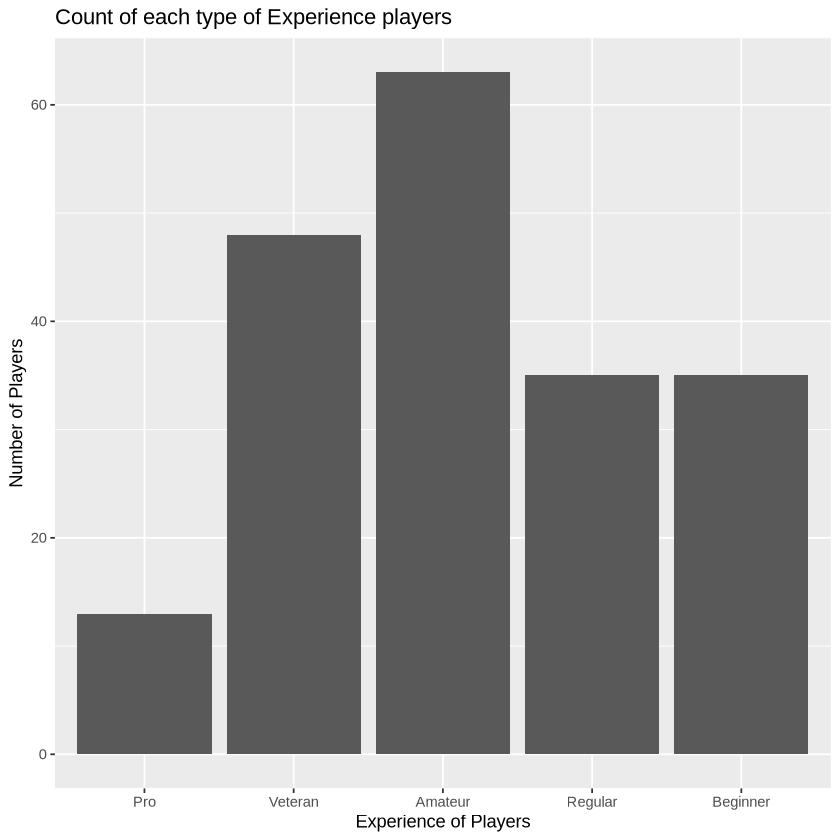

In [13]:
# visualization
players_viz <- players |>
                ggplot(aes(x = experience)) +
                geom_bar() +
                labs(x = "Experience of Players", y = "Number of Players", title = "Count of each type of Experience players")
players_viz

We can see that there is not a lot of data collected on the Pro level players, which means that this level is underrepresented but can have impacts on the predictive anaylsis. As a result, we are going to group the categories into three broader levels——Novice(Amateur, Beginner); Intermediate(Regular, Veteran); Pros(Pro).

In [5]:
#grouping players
novice_players <- players |>
                  filter(experience == "Beginner" | experience == "Amateur")
novice_players


intermediate_players <- players |>
                filter(experience == "Regular" | experience == "Veteran")
intermediate_players

pros <- players |>
        filter(experience == "Pro")
pros

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Amateur,0.7,21
Amateur,0.0,17
Amateur,0.0,21
⋮,⋮,⋮
Amateur,0.0,17
Amateur,0.0,57
Amateur,2.3,17


experience,played_hours,Age
<fct>,<dbl>,<dbl>
Veteran,3.8,17
Veteran,0.0,17
Regular,0.1,21
⋮,⋮,⋮
Regular,0.1,18
Veteran,0.1,44
Veteran,0.3,22


experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Pro,0.0,17
Pro,1.0,17
⋮,⋮,⋮
Pro,0.0,17
Pro,0.2,17
Pro,1.7,17


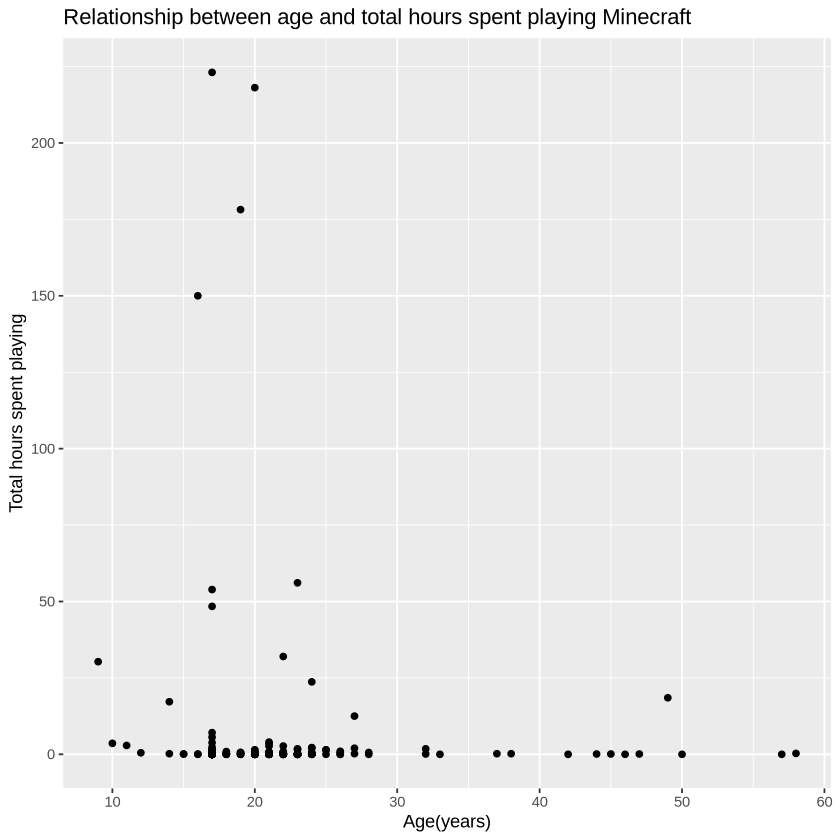

In [6]:
# scatterplot to display the relationship between age of the players and the total hours spent playing Minecraft

players_plot<-players|>
    ggplot(aes(x=Age, y=played_hours))+
    geom_point()+
    labs(title="Relationship between age and total hours spent playing Minecraft",
         x="Age(years)",
         y="Total hours spent playing")
players_plot

In [14]:
# perform data analysis

In [6]:
# visualization of data anaylsis 

`Discussion:`
`summarize what you found`
- `discuss whether this is what you expected to find`
- `discuss what impact could such findings have`
- `discuss what future questions could this lead to`

`References
You may include references if necessary, as long as they all have a consistent citation style.`